In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import os

# Check if the script is running in a Kaggle environment and install Fastai if needed
is_kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if is_kaggle:
    !pip install -Uqq fastai
    
from fastcore.all import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import math
import shutil

In [2]:
# Transformation to extract and format the dog breed name from a folder name 
# (e.g., 'n02085620-Chihuahua' -> 'Chihuahua')

def get_dog_breed(o):
    folder_name = Path(o).parent.name
    breed = str(folder_name).split('-')[1]
    return ' '.join(breed.split('_'))

In [3]:
# Creating the DataBlock for loading and transforming the dog breed images dataset

if is_kaggle: 
    images_dir = Path('/kaggle/input/stanford-dogs-dataset/images/Images')
else:
    images_dir = Path("stanford-dogs-dataset/images/Images")

dls = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                get_items = get_image_files, 
                get_y = get_dog_breed, 
                splitter = RandomSplitter(valid_pct=0.1, seed=42), 
                item_tfms = RandomResizedCrop(224, min_scale=0.5), 
                batch_tfms = aug_transforms(mult=2)).dataloaders(images_dir)

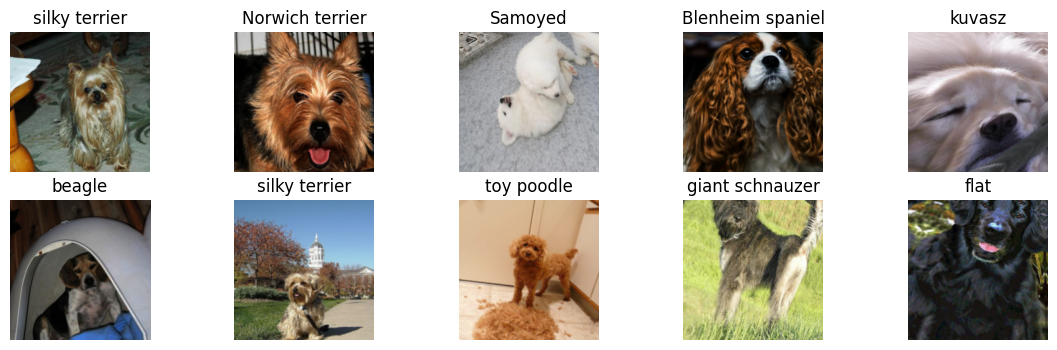

In [6]:
dls.show_batch(max_n=10, nrows=2,figsize=(14, 4))

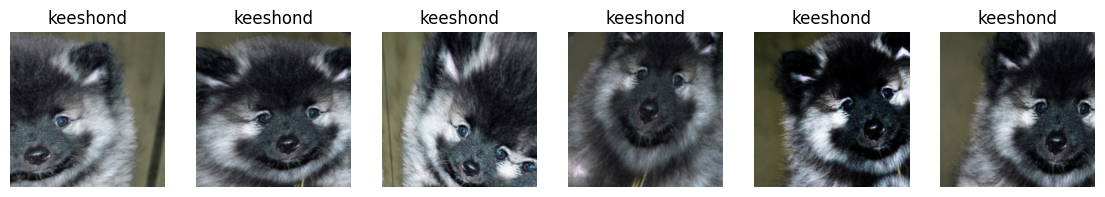

In [7]:
# Some augmented versions of a unique dog image

dls.show_batch(max_n=6, nrows=1,figsize=(14, 4), unique=True)

In [8]:
# Model training

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 180MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.777261,0.623210,0.189504,01:21


epoch,train_loss,valid_loss,error_rate,time
0,1.183207,0.530418,0.159864,01:07
1,1.130807,0.651395,0.206997,01:06
2,1.124328,0.685452,0.207483,01:07
3,1.022059,0.686131,0.209913,01:06
4,0.909138,0.659439,0.192906,01:06
5,0.743006,0.639269,0.188047,01:02
6,0.620159,0.577502,0.182702,01:03
7,0.496787,0.544387,0.169582,01:01
8,0.443029,0.520622,0.154519,01:01
9,0.404804,0.519229,0.159378,01:01


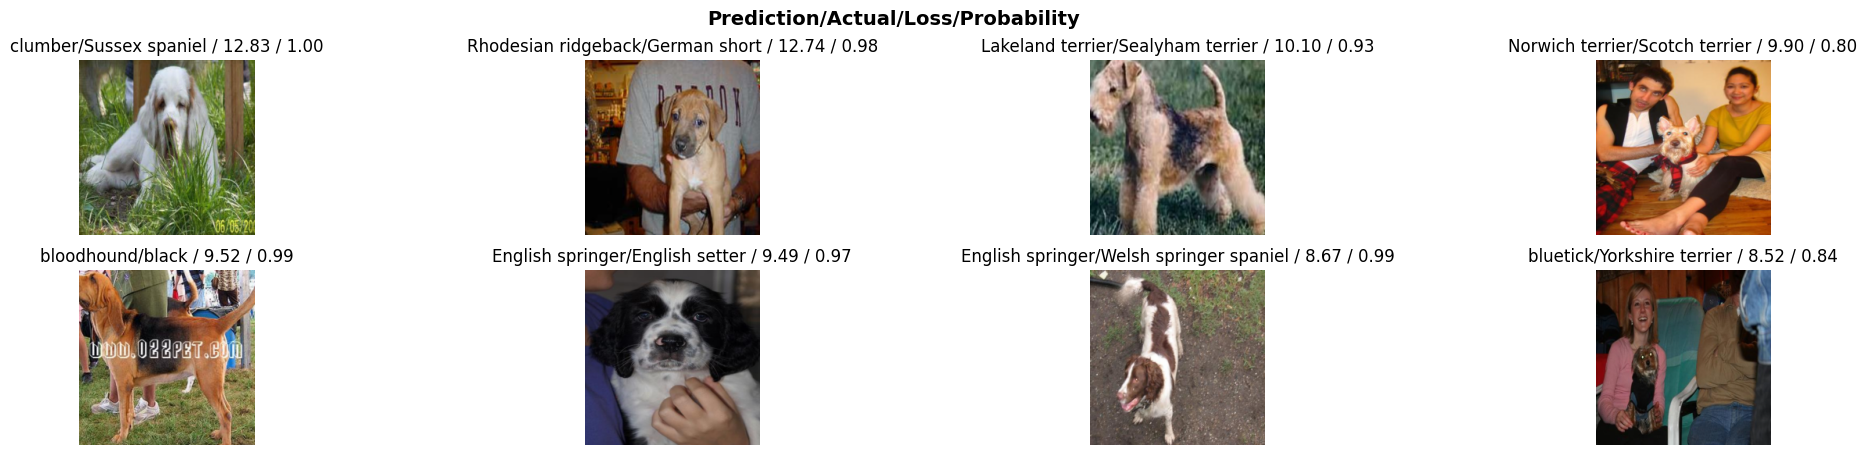

In [9]:
# The images with the highest losses

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(8, nrows=2, figsize=(25, 5))

In [13]:
learn.export('dog_breeds_clf_model.pkl')